In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec


In [19]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
colors = ["#00BFFF","#00D572","#A0EA29","#FF9500","#F80067"]
root = r"D:\hw2025\space weather\project\o"

In [3]:
fp="gen_pred_large/mean_loss_vs_seq_len.npy"
data = np.load(os.path.join(root,fp))
data.shape

(64,)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


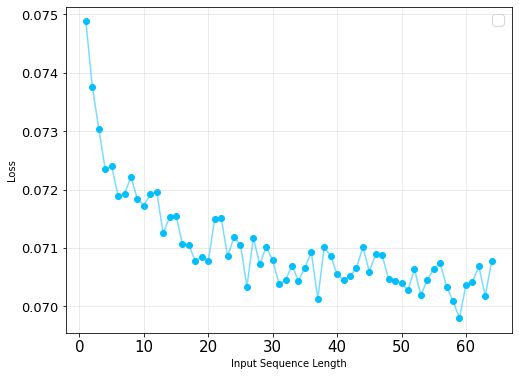

In [4]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1,data.shape[0]+1),data, color="#00BFFF88")
plt.scatter(np.arange(1,data.shape[0]+1),data, color="#00BFFF")
smoothed = np.convolve(data, np.ones(9)/9, mode='valid')
#plt.plot(np.arange(5, data.shape[0]-3), smoothed, color="#FF0067BB",label="Smoothed")
plt.legend()
plt.xlabel("Input Sequence Length")
plt.ylabel("Loss")
plt.grid(alpha=0.3)

In [5]:
fp1="gen_pred_large/MMD_vs_diffstep_seq_mean.npy"
data_mmd = np.load(os.path.join(root,fp1))
fp2="gen_pred_large/NLL_vs_diffstep_seq_mean.npy"
data_nll = np.load(os.path.join(root,fp2))
data_mmd.shape, data_nll.shape

((5, 64), (5, 64))

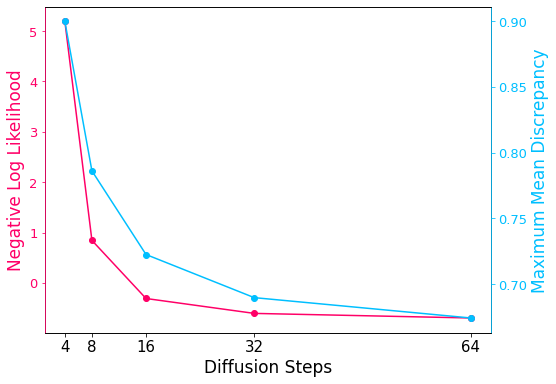

In [6]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
diff_steps = [4, 8, 16, 32, 64]
fig,ax=plt.subplots(1,1,figsize=(8,6))
nll_color = '#FF0067'
ax.plot(diff_steps,data_nll.mean(axis=1), marker='o', color=nll_color)
ax.set_ylabel('Negative Log Likelihood',color=nll_color)
ax.tick_params(axis='y', 
               labelcolor=nll_color,
               color=nll_color) 

ax2 = ax.twinx()
mmd_color = '#00BFFF'
ax2.plot(diff_steps,data_mmd.mean(axis=1), marker='o', color=mmd_color)
ax2.set_ylabel('Maximum Mean Discrepancy',color=mmd_color)
ax2.tick_params(axis='y', 
               labelcolor=mmd_color,
               color=mmd_color) 
ax2.spines['right'].set_color(mmd_color)
ax2.spines['left'].set_color(nll_color)

ax.set_xlabel('Diffusion Steps')

ax.set_xticks(diff_steps,[str(ds) for ds in diff_steps])


In [7]:
mlp_params=[79652,209220,439588,801476,1325604]
transformer_params=[329472,792480,1536256,2622240,4111872]
val_loss =[
    [0.1571, 0.1459, 0.1439, 0.1419, 0.1386, 0.1371, 0.1367, 0.1351, 0.1341, 0.1340],
    [0.1477, 0.1392, 0.1355, 0.1299, 0.1298, 0.1268, 0.1258, 0.1250, 0.1240, 0.1236],
    [0.1406, 0.1324, 0.1279, 0.1245, 0.1236, 0.1210, 0.1210, 0.1209, 0.1209, 0.1202],
    [0.1366,0.1274,0.1247,0.1212,0.1188,0.1182,0.1181,0.1183,0.1175,0.1186],
    [0.1330, 0.1256, 0.1209, 0.1188, 0.1189, 0.1177, 0.1181, 0.1187, 0.1191, 0.1201]
    ]
val_loss=np.array(val_loss)
total_params = [mp+tp for mp,tp in zip(mlp_params, transformer_params)]
print(total_params)
total_params = np.array(total_params)

[409124, 1001700, 1975844, 3423716, 5437476]


Text(0, 0.5, 'Validation Loss')

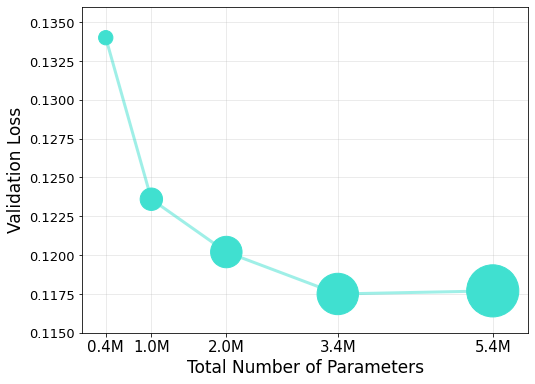

In [9]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.scatter(total_params, val_loss.min(axis=1), color="#40E0D0",s=total_params/2000,zorder=3)
plt.plot(total_params, val_loss.min(axis=1), color="#40E0D0",alpha=0.5,linewidth=3)
plt.ylim(0.115,0.136)
plt.xlim(1e5,5900000)
plt.xticks(total_params, ["0.4M","1.0M","2.0M","3.4M","5.4M"])
plt.grid(alpha=0.3)
plt.xlabel("Total Number of Parameters")
plt.ylabel("Validation Loss")

Text(0, 0.5, 'Validation Loss')

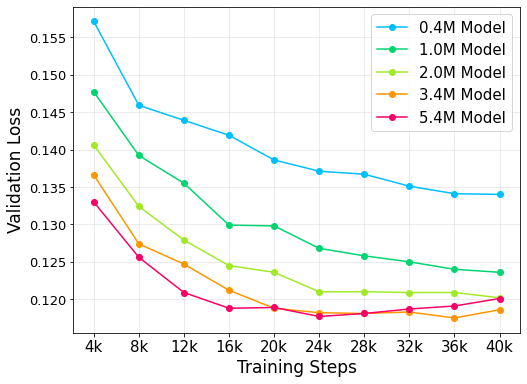

In [20]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
val_step = np.arange(1,val_loss.shape[1]+1)*4000
for i, (loss,color,model_size) in enumerate(zip(val_loss,colors,["0.4M","1.0M","2.0M","3.4M","5.4M"])):
    plt.plot(val_step, loss, "-o",color=color, label=f"{model_size} Model")
    #plt.scatter(val_step, loss, color=color,s=50,zorder=3)
plt.grid(alpha=0.3)
plt.legend()
plt.xticks(val_step, [str(int(vs/1000))+"k" for vs in val_step])
plt.xlabel("Training Steps")
plt.ylabel("Validation Loss")

Text(0, 0.5, '$x_0$ Prediction MSE @ $t=1$')

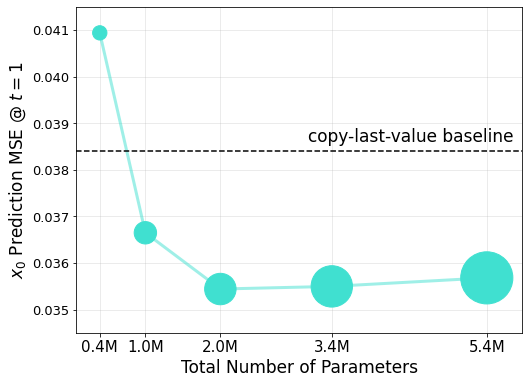

In [18]:
fn="mean_loss_x_vs_t.npy"
folder = ["gen_pred_tiny_fix2","gen_pred_small","gen_pred_medium_fix","gen_pred_large","gen_pred_XL"]

x0_pred_loss = []
for f in folder:
    fp = os.path.join(root,f,fn)
    loss = np.load(fp)
    x0_pred_loss.append(loss[-1])

plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 15,
                     'ytick.labelsize': 13,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.scatter(total_params, x0_pred_loss, color="#40E0D0",s=total_params/2000,zorder=3)
plt.plot(total_params, x0_pred_loss, color="#40E0D0",alpha=0.5,linewidth=3)
plt.hlines(0.0384,1e5,5900000, colors='#000000', linestyles='dashed')
plt.text(3.12e6,0.0386,"copy-last-value baseline")
plt.ylim(0.0345,0.0415)
plt.xlim(1e5,5900000)
plt.xticks(total_params, ["0.4M","1.0M","2.0M","3.4M","5.4M"])
plt.grid(alpha=0.3)
plt.xlabel("Total Number of Parameters")
plt.ylabel("$x_0$ Prediction MSE @ $t=1$")

In [60]:
fp="gen_pred_large/train_loss.npy"
data = np.load(os.path.join(root,fp))
data.shape

(40000,)

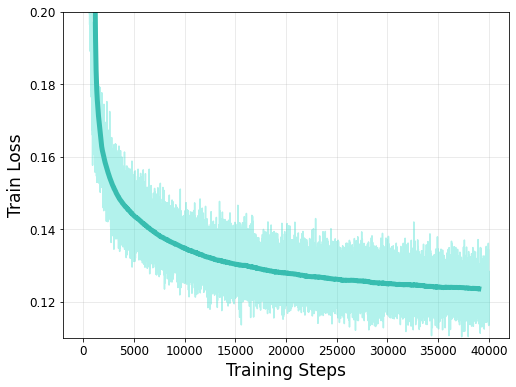

In [72]:
plt.rcParams.update({'font.size': 17,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'legend.fontsize': 15
                     })
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(1,data.shape[0]+1),data, color="#40E0D066")
window_size=1000
smoothed = np.convolve(data, np.ones(window_size*2+1)/(window_size*2+1), mode='valid')
plt.plot(np.arange(window_size, window_size+smoothed.shape[0]), smoothed, lw=5,color="#38BDB0")

plt.ylim(0.11,0.2)
plt.xlabel("Training Steps")
plt.ylabel("Train Loss")
plt.grid(alpha=0.3)